In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
df = pd.read_csv('Five Thirty Eight - Star Wars.csv', encoding='iso-8859-1', sep=',')

In [64]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [65]:
df.shape

(1187, 38)

In [66]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Aqui está uma explicação das colunas do dataset:

1. **entID**: Identificador único para cada entrada no dataset.
2. **Have you seen any of the 6 films in the Star Wars franchise?**: Pergunta se o respondente já assistiu a algum dos seis filmes da franquia Star Wars.
3. **Do you consider yourself to be a fan of the Star Wars film franchise?**: Pergunta se o respondente se considera fã da franquia Star Wars.
4. **Which of the following Star Wars films have you seen? Please select all that apply.**: Lista de filmes da franquia para o respondente marcar quais já assistiu.
5. **Unnamed: 4 a Unnamed: 8**: Provavelmente colunas relacionadas aos filmes específicos, mas sem nomes claros. Pode ser necessário inspecionar os dados para entender melhor.
6. **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.**: Pergunta para classificar os filmes de Star Wars em ordem de preferência.
7. **Unnamed: 10 a Unnamed: 14**: Colunas relacionadas à classificação dos filmes, mas sem nomes claros.
8. **Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.**: Pergunta sobre a opinião do respondente em relação a personagens específicos da franquia.
9. **Unnamed: 16 a Unnamed: 28**: Provavelmente colunas relacionadas a personagens específicos, mas sem nomes claros. Pode ser necessário inspecionar os dados para identificar os personagens.
10. **Which character shot first?**: Pergunta sobre qual personagem atirou primeiro (referência à famosa cena de Han Solo e Greedo).
11. **Are you familiar with the Expanded Universe?**: Pergunta se o respondente está familiarizado com o Universo Expandido de Star Wars.
12. **Do you consider yourself to be a fan of the Expanded Universe?**: Pergunta se o respondente se considera fã do Universo Expandido.
13. **Do you consider yourself to be a fan of the Star Trek franchise?**: Pergunta se o respondente se considera fã da franquia Star Trek.
14. **Gender**: Gênero do respondente.
15. **Age**: Idade do respondente.
16. **Household Income**: Faixa de renda familiar do respondente.
17. **Education**: Nível educacional do respondente.
18. **Location (Census Region)**: Região geográfica do respondente com base no censo.

As colunas com nomes como `Unnamed` podem ser renomeadas ou descartadas, dependendo da relevância para a análise. Recomendo inspecionar os dados dessas colunas para entender melhor o conteúdo.

### Qual o percentual de pessoas que já assistiram a cada um dos filmes de star wars? Esse percentual muda se considerar somente os fãs de star trek?

In [67]:
# Função para verificar se o respondente assistiu a todos os filmes
def assistiu_todos_os_filmes(row):
    # Verifica se há algum valor NaN nas colunas especificadas
    if row.isnull().any():
        return 0
    # Verifica se todos os valores são strings (indicando que o filme foi assistido)
    elif all(isinstance(val, str) for val in row):
        return 1
    else:
        return 0

# Aplica a função às colunas relacionadas aos filmes
df['Assistiu_Todos'] = df.loc[:, 'Which of the following Star Wars films have you seen? Please select all that apply.':'Unnamed: 8'].apply(assistiu_todos_os_filmes, axis=1)

In [68]:
todos_filmes = df.groupby('Do you consider yourself to be a fan of the Star Wars film franchise?')['Assistiu_Todos'].count().reset_index()
todos_filmes['Porcentagem'] = (todos_filmes['Assistiu_Todos'] / 1187) * 100

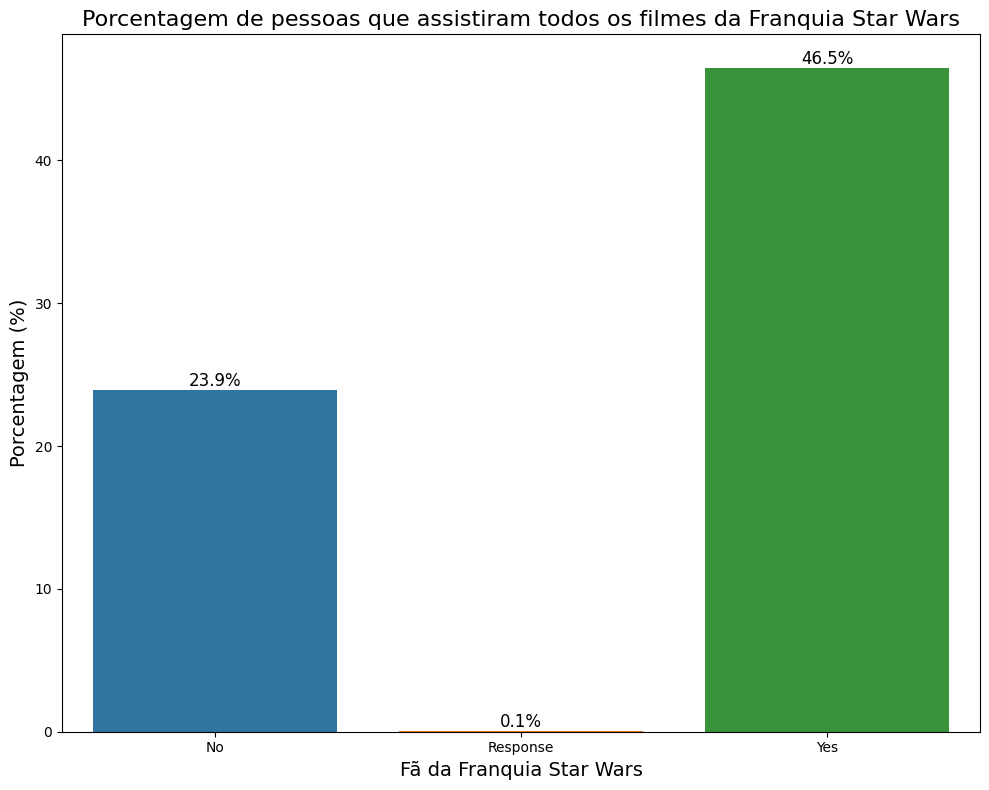

In [69]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=todos_filmes, x='Do you consider yourself to be a fan of the Star Wars film franchise?', y='Porcentagem', hue='Do you consider yourself to be a fan of the Star Wars film franchise?')

# Adiciona título e rótulos aos eixos
ax.set_title('Porcentagem de pessoas que assistiram todos os filmes da Franquia Star Wars', fontsize=16)
ax.set_xlabel('Fã da Franquia Star Wars', fontsize=14)
ax.set_ylabel('Porcentagem (%)', fontsize=14)

# Adiciona os valores no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

**Selecionando as pessoas que se considerm fã da franquia de Star Trek**

In [70]:
star_trek_wars = df.groupby('Do you consider yourself to be a fan of the Star Trek franchise?')['Assistiu_Todos'].count().reset_index()
star_trek_wars['Porcentagem'] = (star_trek_wars['Assistiu_Todos'] / 1187) * 100

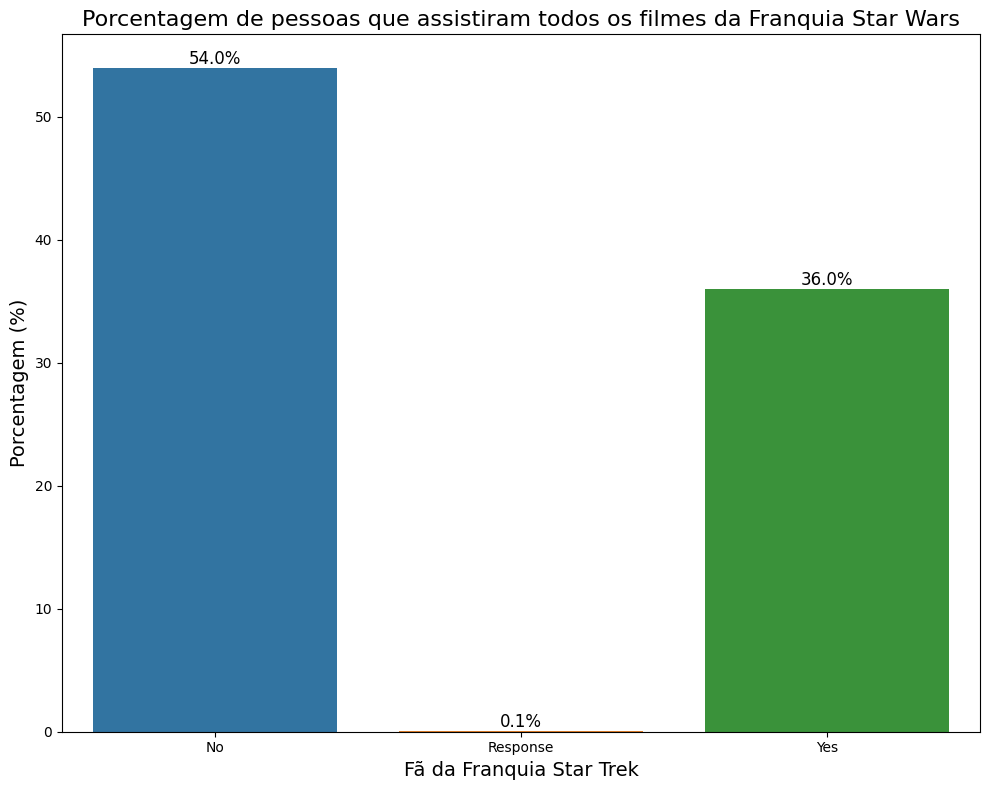

In [71]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=star_trek_wars, x='Do you consider yourself to be a fan of the Star Trek franchise?', y='Porcentagem', hue='Do you consider yourself to be a fan of the Star Trek franchise?')

# Adiciona título e rótulos aos eixos
ax.set_title('Porcentagem de pessoas que assistiram todos os filmes da Franquia Star Wars', fontsize=16)
ax.set_xlabel('Fã da Franquia Star Trek', fontsize=14)
ax.set_ylabel('Porcentagem (%)', fontsize=14)

# Adiciona os valores no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

### Alguns insights

1. **Cruzamento de públicos**: A diferença entre os gráficos parece mostrar uma relação entre ser fã de Star Wars e Star Trek. No primeiro gráfico, 46,5% das pessoas em geral assistiram todos os filmes de Star Wars, mas quando olhamos especificamente para os fãs de Star Trek (segundo gráfico), apenas 35,9% assistiram todos os filmes de Star Wars.
    
2. **Segmentação da amostra**: Os gráficos estão mostrando a mesma população, mas segmentados de forma diferente. O segundo gráfico está dividindo os respondentes com base em serem fãs ou não de Star Trek, e isso revela preferências diferentes na população.
    
3. **Correlação negativa entre franquias**: Parece haver uma tendência de que pessoas que não são fãs de Star Trek (54% da amostra) têm maior probabilidade de terem assistido todos os filmes de Star Wars, sugerindo uma possível preferência por uma franquia sobre a outra.
    
4. **Auto-identificação como fã**: É possível que ser fã de uma franquia influencie a forma como as pessoas consomem a outra. Pessoas que se identificam como fãs de Star Trek podem dedicar menos tempo a assistir todos os filmes de Star Wars.
    
5. **Diferenças de interesse em ficção científica**: O segundo gráfico pode estar revelando subgrupos dentro do universo de fãs de ficção científica, onde alguns preferem uma franquia mais "hard sci-fi" (Star Trek) e outros preferem o estilo mais fantasioso de Star Wars.
    
6. **Demografia específica**: Pode haver características demográficas (idade, gênero, etc.) compartilhadas entre fãs de uma franquia que afetam a probabilidade de assistirem à outra franquia completa.

### Como o nível de escolaridade influencia no percentual de fâs da franquia?

In [72]:
df['Do you consider yourself to be a fan of the Star Wars film franchise?'] = df['Do you consider yourself to be a fan of the Star Wars film franchise?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [73]:
education_fa = df.groupby('Education')['Do you consider yourself to be a fan of the Star Wars film franchise?'].sum().reset_index()
education_fa['Porcentagem'] = (education_fa['Do you consider yourself to be a fan of the Star Wars film franchise?'] / 1187) * 100
education_fa = education_fa.sort_values(by='Porcentagem', ascending=False)

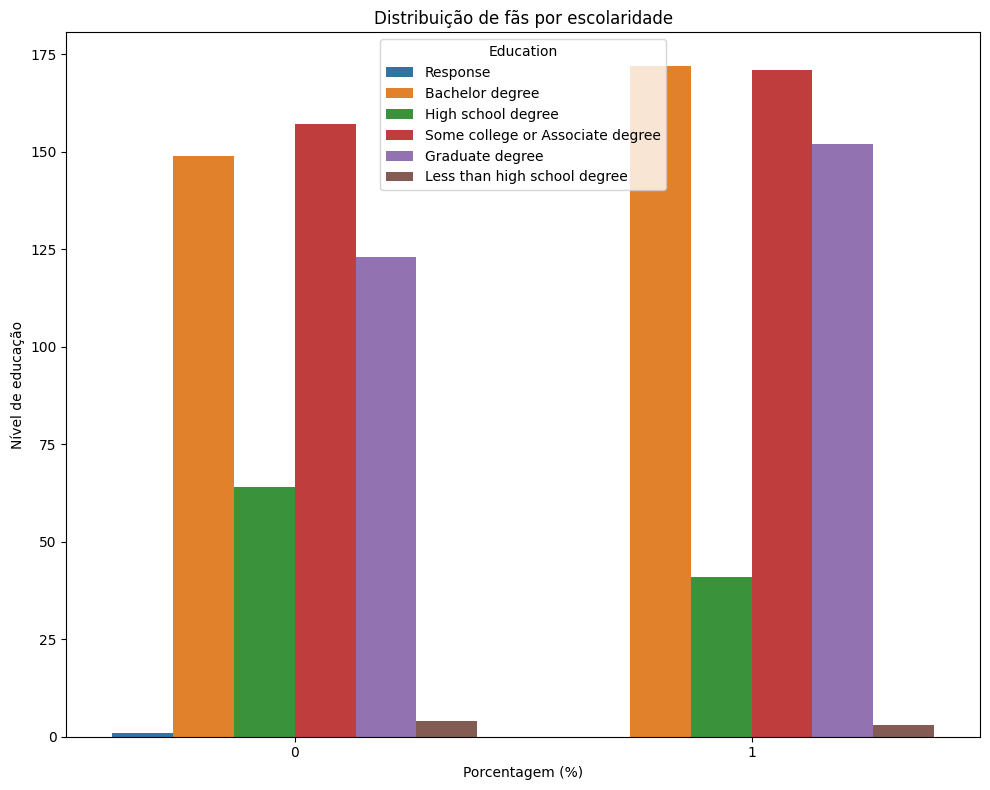

In [74]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Do you consider yourself to be a fan of the Star Wars film franchise?', hue='Education')
plt.title('Distribuição de fãs por escolaridade')
plt.ylabel('Nível de educação')
plt.xlabel('Porcentagem (%)')
plt.tight_layout()
plt.show()

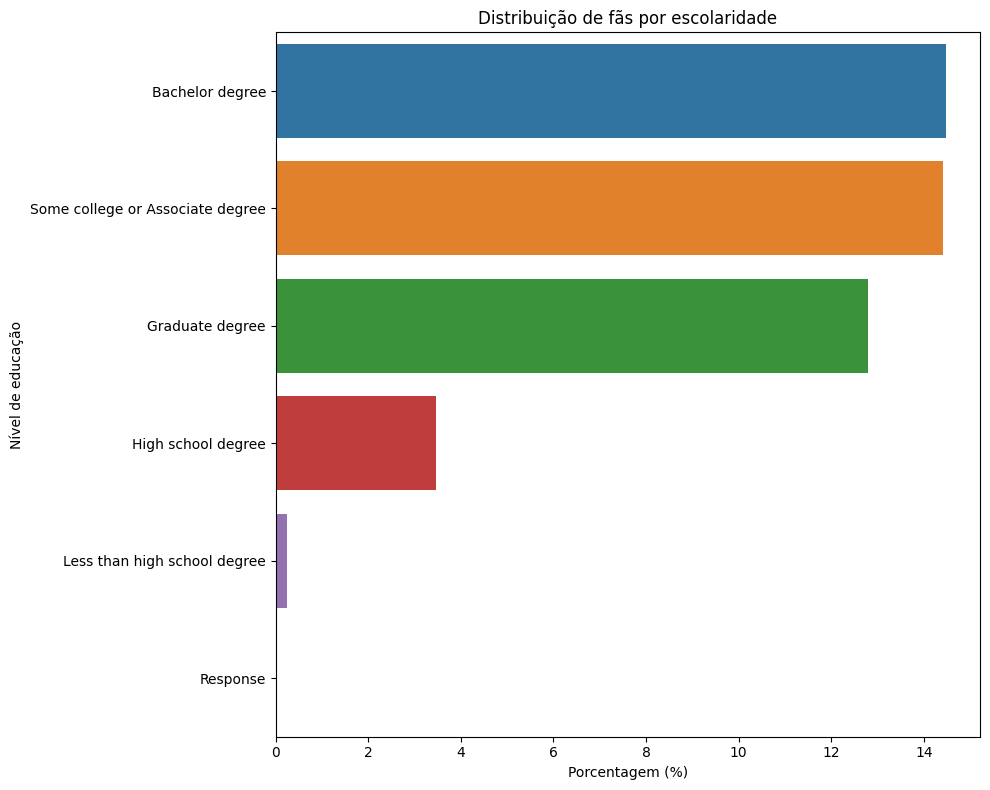

In [75]:
plt.figure(figsize=(10, 8))
sns.barplot(data=education_fa, y='Education', x='Porcentagem', hue='Education')
plt.title('Distribuição de fãs por escolaridade')
plt.ylabel('Nível de educação')
plt.xlabel('Porcentagem (%)')
plt.tight_layout()
plt.show()

1. Perfil Intelectual dos Fãs:

- A alta concentração de fãs com formação superior sugere um público bastante instruído
- Muitos fãs têm pelo menos alguns anos de faculdade ou curso técnico
- Baixíssima representatividade de pessoas com menos que ensino médio

2. Características dos Fãs de Star Wars:

- Provável público que aprecia a complexidade narrativa e filosófica da saga
- Interesse por elementos como:
    - Mitologia elaborada
    - Discussões sobre ética, política e filosofia presentes na história
    - Tecnologia e worldbuilding científico
- Capacidade de análise profunda do universo de Star Wars

3. Potenciais Impactos:

- Público propenso a:
    - Consumir conteúdos complementares (livros, documentários, análises)
    - Participar de discussões detalhadas sobre a franquia
    - Valorizar a riqueza narrativa mais do que apenas ação superficial

4. Curiosidade Sociológica:

- Star Wars transcende entretenimento, tornando-se quase um objeto de estudo
- Fãs parecem buscar significados além da narrativa superficial

### Existe alguma diferença significativa pelos filmes entre as diferentes faixas de idade?

In [76]:
df = df.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'Star Wars: Episode I The Phantom Menace',
                   'Unnamed: 4': 'Star Wars: Episode II Attack of the Clones',
                   'Unnamed: 5': 'Star Wars: Episode III Revenge of the Sith',
                   'Unnamed: 6': 'Star Wars: Episode IV A New Hope',
                   'Unnamed: 7': 'Star Wars: Episode V The Empire Strikes Back',
                   'Unnamed: 8': 'Star Wars: Episode VI Return of the Jedi',
                   })

In [77]:
filmes_colunas = [
    'Star Wars: Episode I The Phantom Menace',
    'Star Wars: Episode II Attack of the Clones',
    'Star Wars: Episode III Revenge of the Sith',
    'Star Wars: Episode IV A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi'
]

df.columns = df.columns.str.strip()

for i in filmes_colunas:
    df[i] = df[i].apply(lambda x: 0 if pd.isna(x) else 1)

In [78]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Assistiu_Todos
0,NaN,Response,0,1,1,1,1,1,1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response,1
1,3.292880e+09,Yes,1,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,1
2,3.292880e+09,No,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0
3,3.292765e+09,Yes,0,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central,0
4,3.292763e+09,Yes,1,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1


In [79]:
filmes_colunas = [
    'Star Wars: Episode I The Phantom Menace',
    'Star Wars: Episode II Attack of the Clones',
    'Star Wars: Episode III Revenge of the Sith',
    'Star Wars: Episode IV A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi'
]

In [80]:
# Cria uma tabela pivot para contar as aparições dos filmes por idade
pivot_table = df.melt(id_vars=['Age'], value_vars=filmes_colunas, 
                      var_name='Filme', value_name='Assistiu')

In [81]:
pivot_table.head()

,Age,Filme,Assistiu
0,Response,Star Wars: Episode I The Phantom Menace,1
1,18-29,Star Wars: Episode I The Phantom Menace,1
2,18-29,Star Wars: Episode I The Phantom Menace,0
3,18-29,Star Wars: Episode I The Phantom Menace,1
4,18-29,Star Wars: Episode I The Phantom Menace,1


In [82]:
pivot_table = pivot_table[pivot_table['Age'] != 'Response']

In [83]:
pivot_table = pivot_table.sort_values(by='Age', ascending=True)

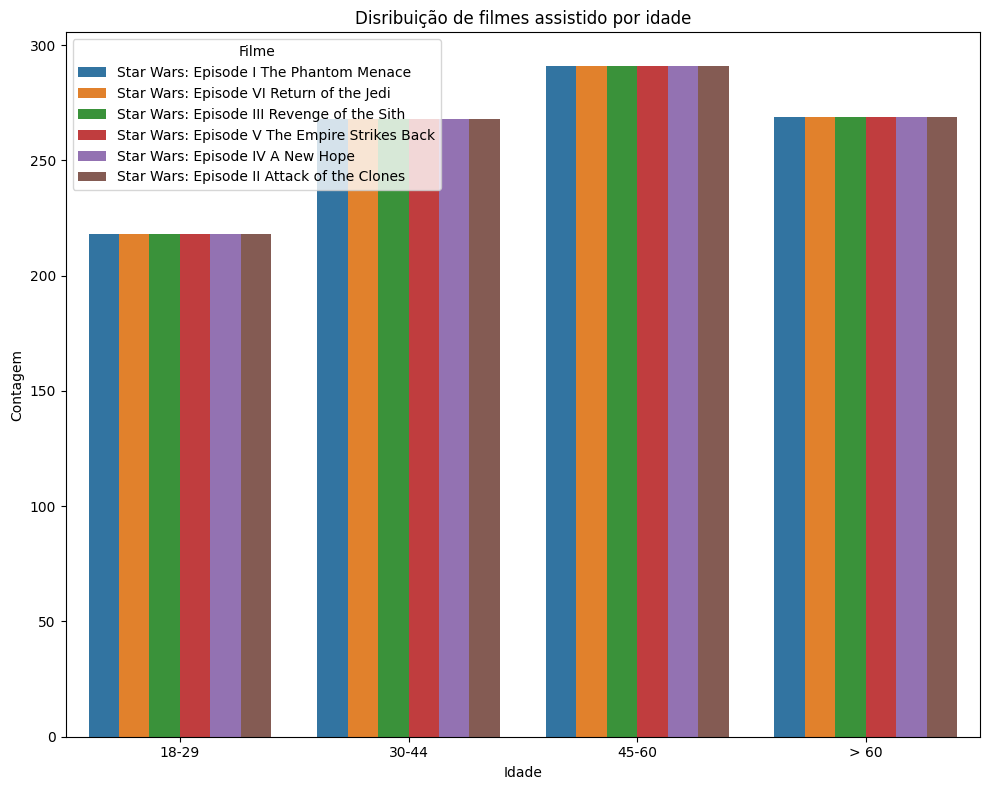

In [84]:
plt.figure(figsize=(10, 8))
sns.countplot(data=pivot_table, x='Age', hue='Filme')
plt.title('Disribuição de filmes assistido por idade')
plt.ylabel('Contagem')
plt.xlabel('Idade')
plt.tight_layout()
plt.show()

### Qual a classificação média da franquia entre os espectadores?

In [85]:
df = df.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Star Wars: Episode I The Phantom Menace (rate)',
                   'Unnamed: 10': 'Star Wars: Episode II Attack of the Clones (rate)',
                   'Unnamed: 11': 'Star Wars: Episode III Revenge of the Sith (rate)',
                   'Unnamed: 12': 'Star Wars: Episode IV A New Hope (rate)',
                   'Unnamed: 13': 'Star Wars: Episode V The Empire Strikes Back (rate)',
                   'Unnamed: 14': 'Star Wars: Episode VI Return of the Jedi (rate)',
                   })

In [86]:
df = df.rename(columns={'Han Solo': 'Han Solo',
                   'Unnamed: 16': 'Luke Skywalker',
                   'Unnamed: 17': 'Princess Leia Organa',
                   'Unnamed: 18': 'Anakin Skywalker',
                   'Unnamed: 19': 'Obi Wan Kenobi',
                   'Unnamed: 20': 'Emperor Palpatine',
                   'Unnamed: 21': 'Darth Vader',
                   'Unnamed: 22': 'Lando Calrissian',
                   'Unnamed: 23': 'Boba Fett',
                   'Unnamed: 24': 'C-3P0',
                   'Unnamed: 25': 'R2 D2',
                   'Unnamed: 26': 'Jar Jar Binks',
                   'Unnamed: 27': 'Padme Amidala',
                   'Unnamed: 28': 'Yoda',
                   })

In [87]:
df = df.drop(index=0, inplace=False)

In [88]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace (rate),Star Wars: Episode II Attack of the Clones (rate),Star Wars: Episode III Revenge of the Sith (rate),Star Wars: Episode IV A New Hope (rate),Star Wars: Episode V The Empire Strikes Back (rate),Star Wars: Episode VI Return of the Jedi (rate),"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Assistiu_Todos
1,3.292880e+09,Yes,1,1,1,1,1,1,1,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,1
2,3.292880e+09,No,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0
3,3.292765e+09,Yes,0,1,1,1,0,0,0,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central,0
4,3.292763e+09,Yes,1,1,1,1,1,1,1,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1
5,3.292731e+09,Yes,1,1,1,1,1,1,1,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1


In [89]:
filmes_colunas_rate = [
    'Star Wars: Episode I The Phantom Menace (rate)',
    'Star Wars: Episode II Attack of the Clones (rate)',
    'Star Wars: Episode III Revenge of the Sith (rate)',
    'Star Wars: Episode IV A New Hope (rate)',
    'Star Wars: Episode V The Empire Strikes Back (rate)',
    'Star Wars: Episode VI Return of the Jedi (rate)'
]

In [90]:
for i in filmes_colunas_rate:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [91]:
rating_filmes = df[[
    'Star Wars: Episode I The Phantom Menace (rate)',
    'Star Wars: Episode II Attack of the Clones (rate)',
    'Star Wars: Episode III Revenge of the Sith (rate)',
    'Star Wars: Episode IV A New Hope (rate)',
    'Star Wars: Episode V The Empire Strikes Back (rate)',
    'Star Wars: Episode VI Return of the Jedi (rate)'
]].mean()

rating_filmes = rating_filmes.reset_index()
rating_filmes.columns = ['Filme', 'Classificação Média']
rating_filmes = rating_filmes.sort_values(by='Classificação Média', ascending=False)

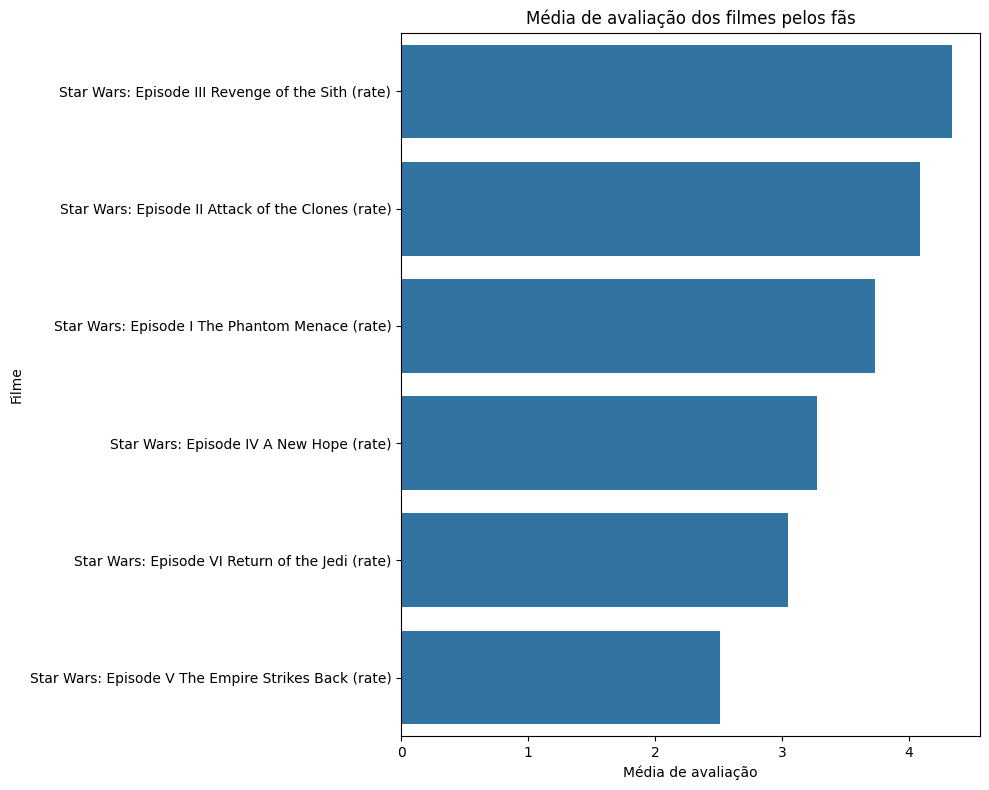

In [92]:
plt.figure(figsize=(10, 8))
sns.barplot(data=rating_filmes, y='Filme', x='Classificação Média')
plt.ylabel('Filme')
plt.xlabel('Média de avaliação')
plt.title('Média de avaliação dos filmes pelos fãs')
plt.tight_layout()
plt.show()

1. Hierarquia de Preferência:
- "Revenge of the Sith" (Episódio III) possui a maior nota
- "Attack of the Clones" (Episódio II) e "The Phantom Menace" (Episódio I) seguem em popularidade
- Filmes da trilogia prequel têm avaliações relativamente altas

2. Nuances da Avaliação:
- Todas as notas parecem estar concentradas entre 2 e 3
- Variação relativamente pequena entre as avaliações
- Sugere uma base de fãs crítica, mas globalmente positiva

3. Contexto Geracional:
- Altas notas para os filmes prequels podem refletir:
  - Nostalgia da geração que cresceu com esses filmes
  - Apreciação posterior da complexidade narrativa
  - Desenvolvimento de uma visão mais compreensiva da saga

4. Curiosidades:
- Filmes originais têm notas ligeiramente menores
- "The Empire Strikes Back" (Episódio V), considerado clássico, não tem a nota mais alta
- Demonstra a complexidade da recepção dos fãs

5. Análise Geral:
- Star Wars transcende avaliações simples
- Fãs têm uma relação complexa e profunda com a franquia
- Cada filme contribui para uma narrativa maior

**A análise sugere que os fãs avaliam os filmes não apenas individualmente, mas como parte de um universo rico e interconectado.**

### Entre aqueles que assistiram os filmes, quais personagens são mais e menos populares?

In [93]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace (rate),Star Wars: Episode II Attack of the Clones (rate),Star Wars: Episode III Revenge of the Sith (rate),Star Wars: Episode IV A New Hope (rate),Star Wars: Episode V The Empire Strikes Back (rate),Star Wars: Episode VI Return of the Jedi (rate),"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Assistiu_Todos
1,3.292880e+09,Yes,1,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,1
2,3.292880e+09,No,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central,0
3,3.292765e+09,Yes,0,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central,0
4,3.292763e+09,Yes,1,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1
5,3.292731e+09,Yes,1,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1


In [94]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Star Wars: Episode I The Phantom Menace',
       'Star Wars: Episode II Attack of the Clones',
       'Star Wars: Episode III Revenge of the Sith',
       'Star Wars: Episode IV A New Hope',
       'Star Wars: Episode V The Empire Strikes Back',
       'Star Wars: Episode VI Return of the Jedi',
       'Star Wars: Episode I The Phantom Menace (rate)',
       'Star Wars: Episode II Attack of the Clones (rate)',
       'Star Wars: Episode III Revenge of the Sith (rate)',
       'Star Wars: Episode IV A New Hope (rate)',
       'Star Wars: Episode V The Empire Strikes Back (rate)',
       'Star Wars: Episode VI Return of the Jedi (rate)',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Luke Skywalker', 'Princess Leia Organa', 'Ana

In [95]:
perso_cols = [
    'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
    'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',
    'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks',
    'Padme Amidala', 'Yoda'
]

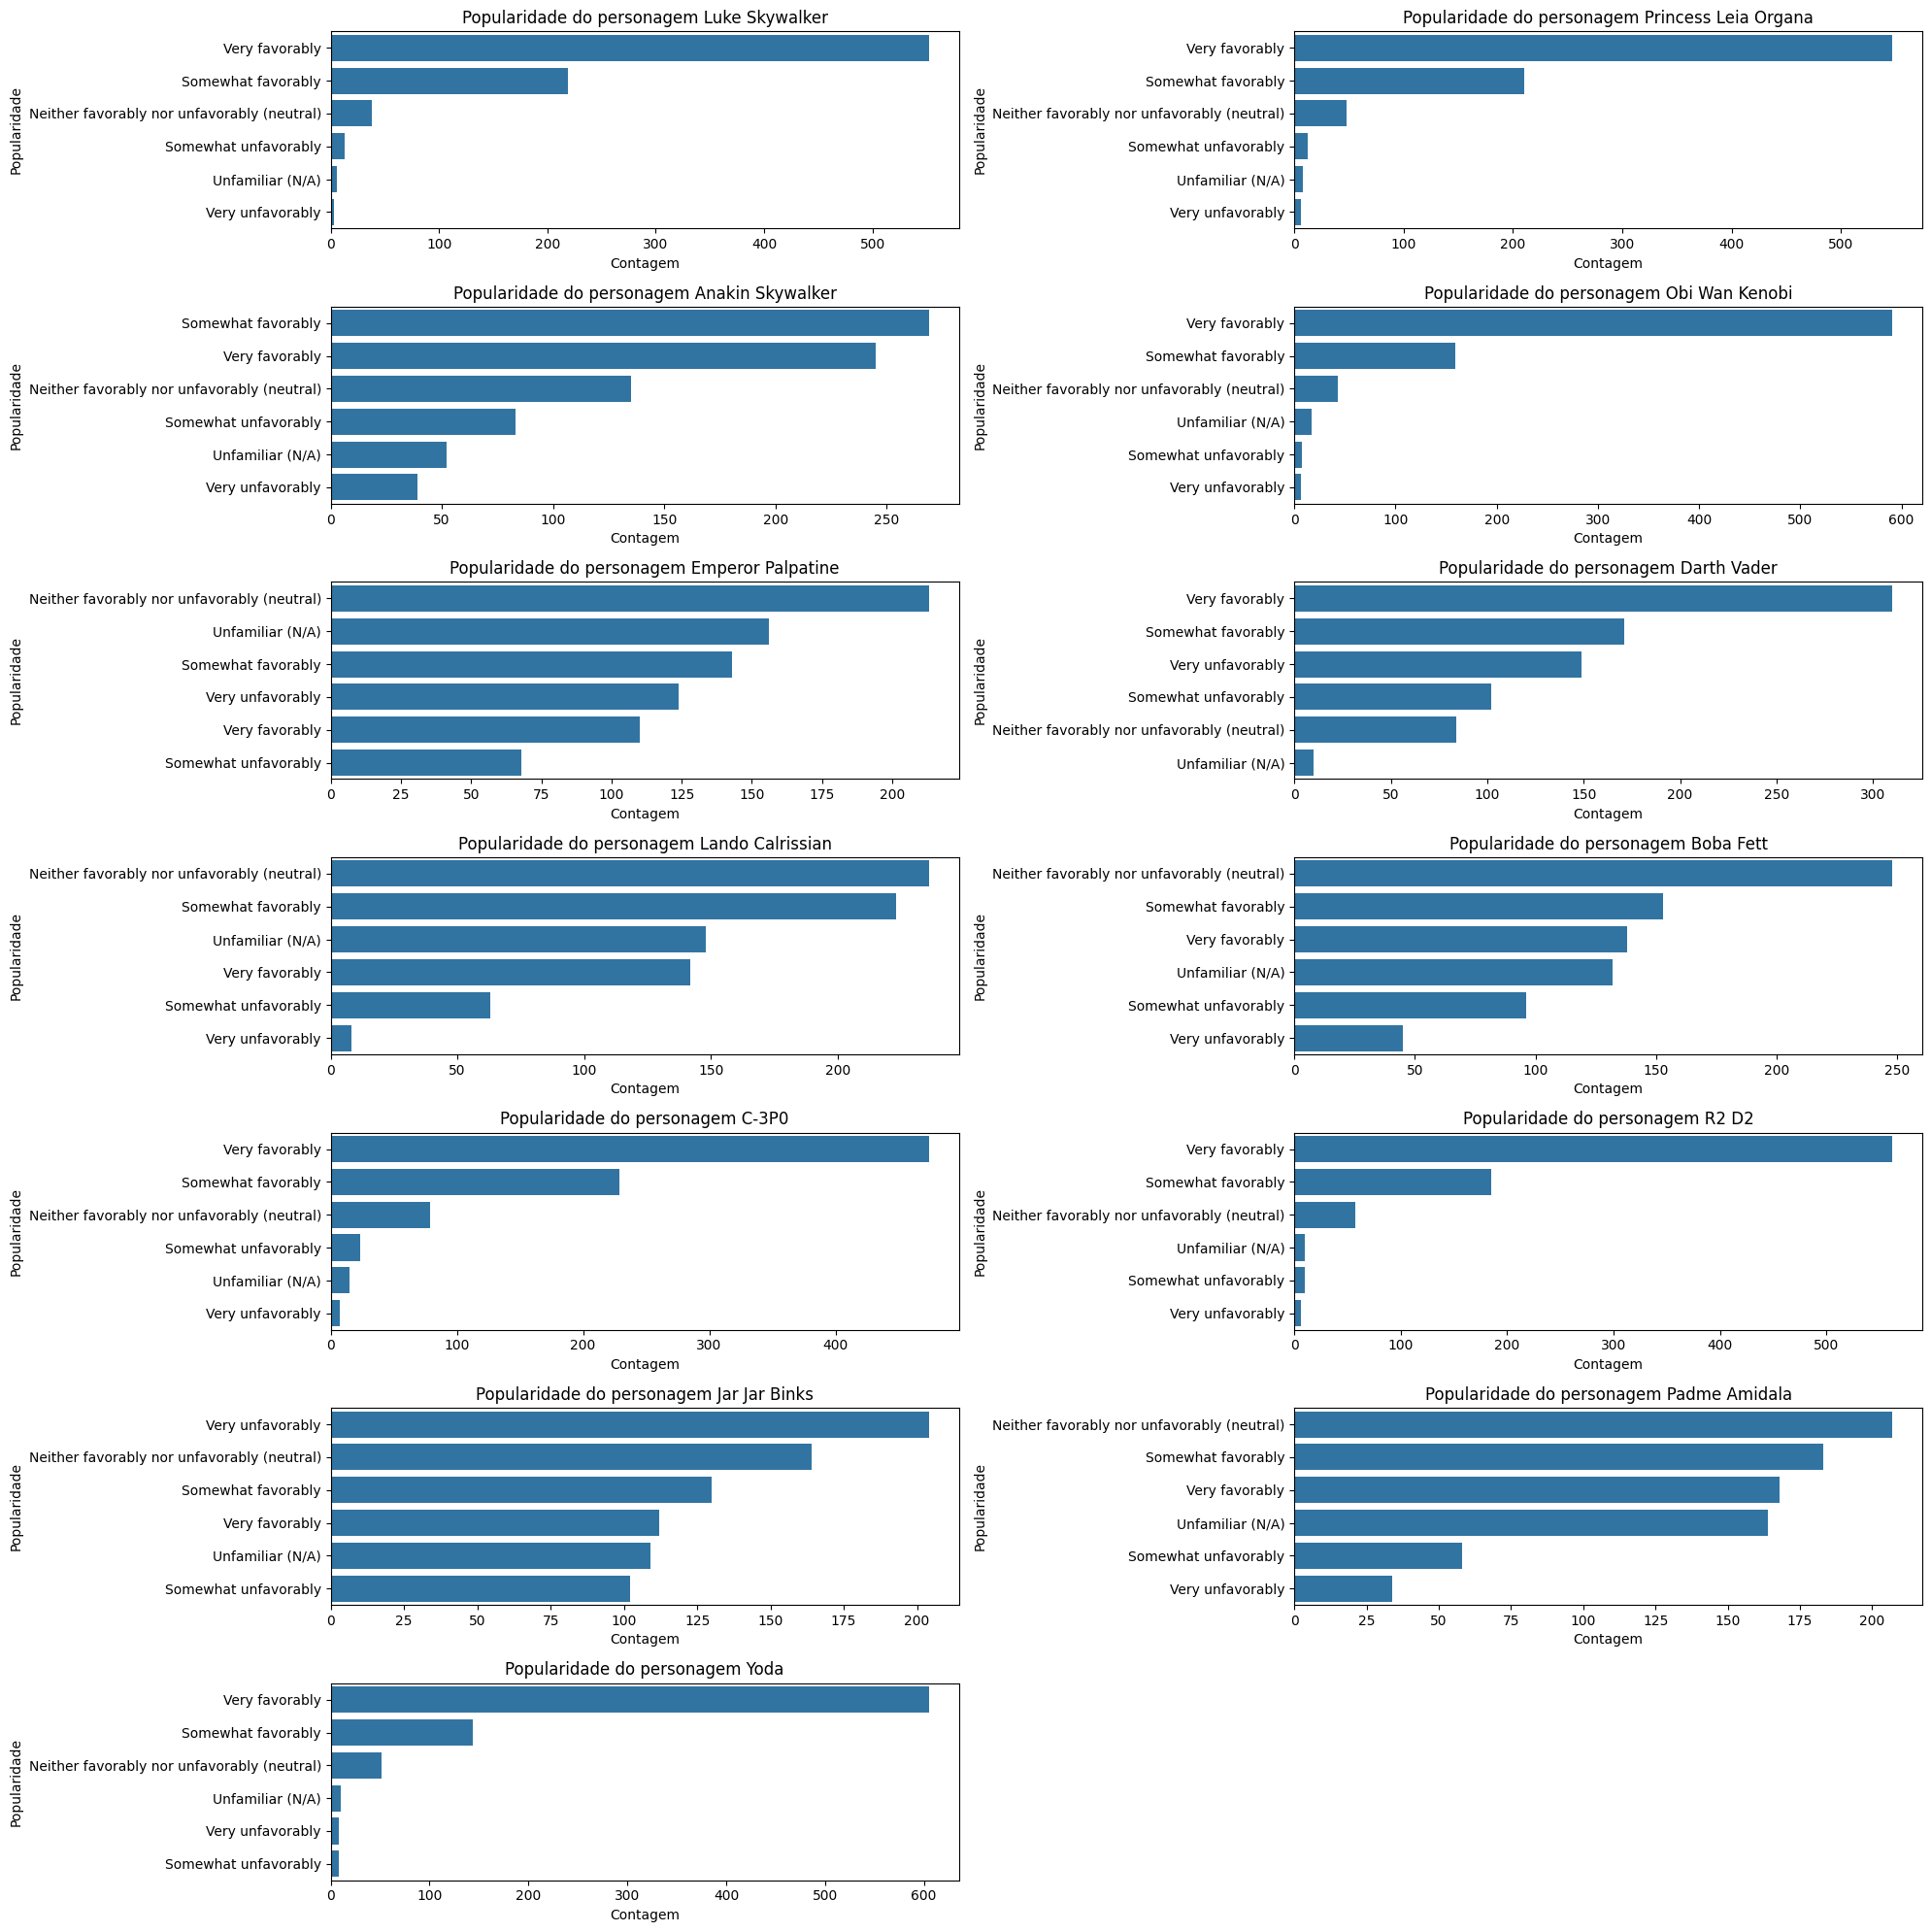

In [96]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))  # Ajuste o número de linhas e colunas conforme necessário
axes = axes.flatten()  # Achata os eixos para facilitar a iteração

# Itera sobre os personagens e os eixos
for idx, (i, ax) in enumerate(zip(perso_cols, axes)):
    perso_values = df[i].value_counts()
    sns.barplot(y=perso_values.index, x=perso_values.values, ax=ax)
    ax.set_title(f'Popularidade do personagem {i}')
    ax.set_ylabel('Popularidade')
    ax.set_xlabel('Contagem')

# Remove subplots vazios (se houver mais subplots do que personagens)
for ax in axes[len(perso_cols):]:
    fig.delaxes(ax)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Personagem Mais Popular:

- Yoda, com a maior quantidade de avaliações "Muito Favorável" e uma distribuição bastante positiva

Personagem Menos Popular:

- Jar Jar Binks, com a maior quantidade de avaliações "Muito Desfavorável" e uma distribuição claramente negativa

Alguns detalhes adicionais:

- Yoda com um pouco mais de 600 contagens na categoria "Muito Favorável"
- Jar Jar Binks tem uma predominância de avaliações negativas
- Outros personagens como Luke Skywalker, Darth Vader e Obi Wan Kenobi também têm alta popularidade

A rejeição de Jar Jar Binks é um fenômeno interessante na cultura de Star Wars, resultado principalmente de sua representação cômica no Episódio I que não agradou a muitos fãs.

### Qual o percentual de respondentes que assistiram o episódio V e não souberam responder a pergunta 'Which character shot first?'

In [97]:
df_shot = df[df['Star Wars: Episode V The Empire Strikes Back'] == 1]

In [98]:
df_shot.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace (rate),Star Wars: Episode II Attack of the Clones (rate),Star Wars: Episode III Revenge of the Sith (rate),Star Wars: Episode IV A New Hope (rate),Star Wars: Episode V The Empire Strikes Back (rate),Star Wars: Episode VI Return of the Jedi (rate),"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region),Assistiu_Todos
1,3.292880e+09,Yes,1,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic,1
4,3.292763e+09,Yes,1,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1
5,3.292731e+09,Yes,1,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central,1
6,3.292719e+09,Yes,1,1,1,1,1,1,1,1.0,4.0,3.0,6.0,5.0,2.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic,1
7,3.292685e+09,Yes,1,1,1,1,1,1,1,6.0,5.0,4.0,3.0,1.0,2.0,Very favorably,Very favorably,Somewhat favorably,Somewhat favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Somewhat favorably,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central,1


In [99]:
qnt = df_shot.shape[0]

In [100]:
df_shot['Which character shot first?'].value_counts()

Which character shot first?
Han                                 313
I don't understand this question    258
Greedo                              179
Name: count, dtype: int64

In [101]:
print(f'Das {qnt} pesssoas que assistiram ao ep V, {(258/qnt) * 100:.2f}% não souberam responder essa pergunta.')

Das 758 pesssoas que assistiram ao ep V, 34.04% não souberam responder essa pergunta.


### Quais os fatores parecem influenciar mais a probabilidade de alguem se considerar fã da franquia?

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Selecionar variáveis independentes e dependente
X = df[['Gender', 'Age', 'Household Income', 'Education', 'Do you consider yourself to be a fan of the Star Trek franchise?']]
y = df['Do you consider yourself to be a fan of the Star Wars film franchise?']

# Codificar variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# Verificar os coeficientes
coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef.sort_values(by='Coefficient', ascending=False))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       185
           1       0.86      0.67      0.76       171

    accuracy                           0.79       356
   macro avg       0.81      0.79      0.79       356
weighted avg       0.80      0.79      0.79       356

AUC: 0.8333491386122964
                                              Feature  Coefficient
12  Do you consider yourself to be a fan of the St...     2.967211
0                                         Gender_Male     0.797729
10             Education_Less than high school degree     0.544966
8                           Education_Graduate degree     0.500812
4                Household Income_$100,000 - $149,999     0.460956
5                          Household Income_$150,000+     0.421503
11         Education_Some college or Associate degree     0.416134
7                  Household Income_$50,000 - $99,999     0.134203
6                  Household Income_$25,000 - 

### **Interpretação Geral**
- **Fatores Demográficos:**
  - Gênero masculino, idade mais jovem e níveis mais altos de educação são fatores que aumentam a probabilidade de alguém ser fã de Star Wars.
  
- **Interesse por Ficção Científica:**
  - Ser fã de Star Trek é o fator mais influente, indicando que há uma sobreposição significativa entre os públicos das duas franquias.

- **Renda e Educação:**
  - Renda mais alta e educação superior estão positivamente associadas ao fandom de Star Wars, possivelmente devido ao acesso a produtos e eventos relacionados à franquia.

- **Idade:**
  - A probabilidade de ser fã diminui com a idade, sugerindo que Star Wars pode ter maior apelo entre gerações mais jovens.

### Como as preferênias entre os personagens variam entre as regiões?

In [103]:
# Cria uma tabela pivot para contar as aparições dos filmes por idade
perso_demo = df.melt(id_vars=['Location (Census Region)'], value_vars=perso_cols, 
                      var_name='Personagem', value_name='Popularidade')

In [104]:
perso_demo.shape

(15418, 3)

In [105]:
def atribuir_popularidade(valor):
    """
    Função para atribuir valores de popularidade com base em uma ordem específica.
    """
    # Dicionário de mapeamento para popularidade
    mapeamento_popularidade = {
        "Very favorably": 5,
        "Somewhat favorably": 4,
        "Neither favorably nor unfavorably (neutral)": 3,
        "Unfamiliar (N/A)": 2,
        "Somewhat unfavorably": 1,
        "Very unfavorably": 0
    }
    
    # Retorna o valor correspondente ou NaN se não estiver no mapeamento
    return mapeamento_popularidade.get(valor, np.nan)

# Exemplo de aplicação em uma coluna do DataFrame
perso_demo['Popularidade_numerica'] = perso_demo['Popularidade'].apply(atribuir_popularidade)

In [106]:
perso_demo.head()

,Location (Census Region),Personagem,Popularidade,Popularidade_numerica
0,South Atlantic,Luke Skywalker,Very favorably,5.0
1,West South Central,Luke Skywalker,NaN,NaN
2,West North Central,Luke Skywalker,Somewhat favorably,4.0
3,West North Central,Luke Skywalker,Very favorably,5.0
4,West North Central,Luke Skywalker,Somewhat favorably,4.0


In [107]:
perso_demo = perso_demo.dropna()
perso_demo = perso_demo.sort_values(by='Popularidade_numerica', ascending=False)

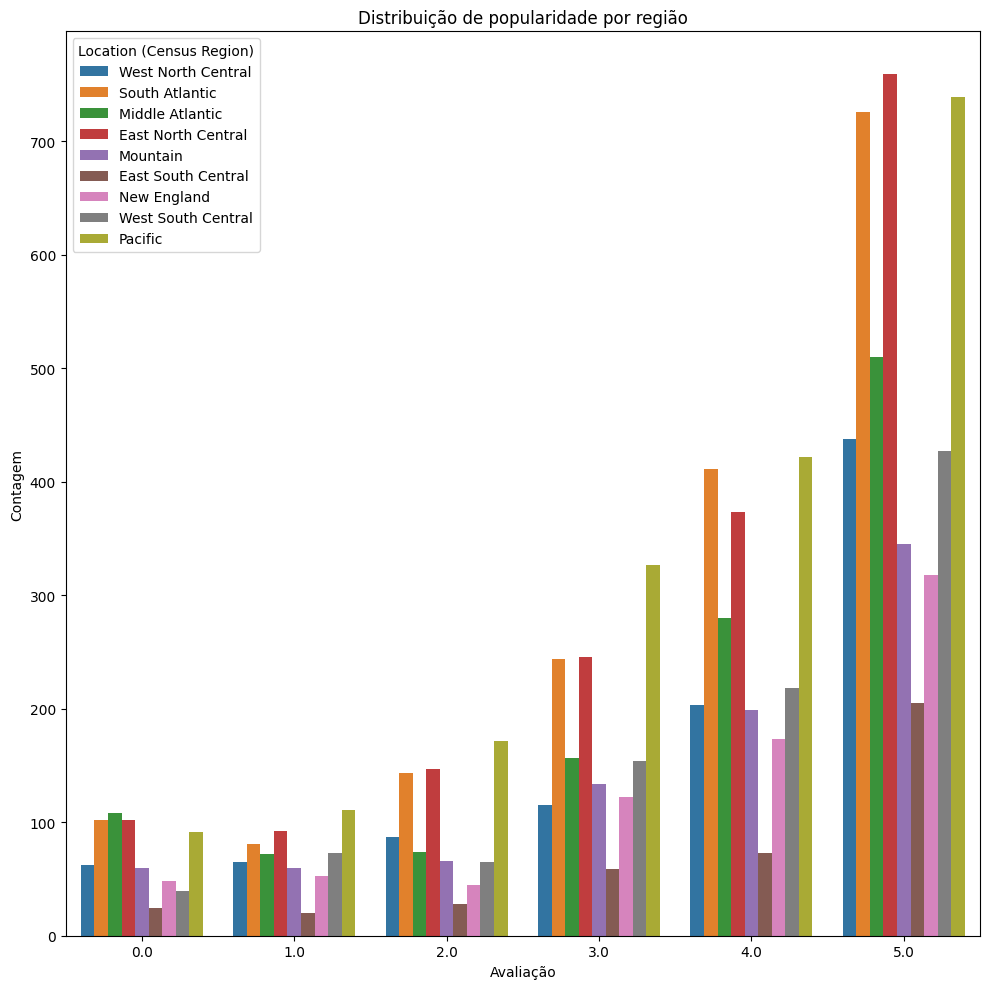

In [108]:
plt.figure(figsize=(10, 10))
sns.countplot(data=perso_demo, x='Popularidade_numerica',hue='Location (Census Region)')
plt.title('Distribuição de popularidade por região')
plt.xlabel('Avaliação')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

Claro, Gabriel! Vamos analisar o gráfico **"Distribuição de popularidade por região"** com base nas contagens de avaliações de 0 a 5 em diferentes regiões dos EUA.

### **O que o gráfico mostra:**

- Eixo X: Avaliação de popularidade (de 0 a 5).
    
- Eixo Y: Contagem (número de ocorrências/avaliações).
    
- As cores representam diferentes **regiões do censo** dos EUA.
    

---

### **Insights principais:**

#### 1. **Tendência geral:**

- Há uma **tendência clara de crescimento da contagem com o aumento da nota**. Ou seja, notas mais altas (4 e 5) são muito mais frequentes.
    
- Isso indica uma **distribuição positiva de popularidade**, com **predomínio de avaliações altas**.
    

#### 2. **Regiões com maior popularidade:**

- **East South Central** (vermelho escuro) e **Pacific** (verde oliva) dominam nas avaliações **nota 5**, passando de 700 ocorrências cada.
    
- Também são fortes nas notas 4, o que mostra que são regiões com **alto engajamento ou preferência do público**.
    

#### 3. **Regiões com menor engajamento/popularidade:**

- **East North Central**, **Mountain** e **West North Central** têm contagens menores em todas as notas, principalmente nas notas mais altas. Isso pode indicar:
    
    - Menor número de usuários.
        
    - Menor interesse ou menor popularidade dos itens avaliados nessas regiões.
        

#### 4. **Curiosidade sobre nota 0:**

- Mesmo as regiões mais fortes têm valores expressivos em nota 0. Isso sugere que mesmo produtos/serviços populares ainda geram **avaliações extremamente negativas**, o que pode indicar polarização de opiniões ou problemas específicos.
    

---

### **Aplicação prática (para um cientista de dados):**

- Se você estiver analisando **produtos, serviços ou conteúdos por região**, pode usar essa informação para:
    
    - **Segmentar campanhas** de marketing nas regiões com maior engajamento.
        
    - Investigar **críticas negativas** (notas 0 ou 1) mesmo nas regiões com alta nota 5.
        
    - Avaliar o **alcance e receptividade regional** de um produto antes de lançamentos nacionais.

### Existe alguma diferença no perfil demográfico entre os que são fãs e os que não são de star wars?

In [109]:
fa_starWars = df[df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 1]

In [110]:
not_fa_starWars = df[df['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 0]

In [111]:
demo_infos = [
    'Gender', 'Age', 'Household Income', 'Education',
    'Location (Census Region)', 'Assistiu_Todos'
]

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\2713674692.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\2713674692.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\2713674692.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\2713674692.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

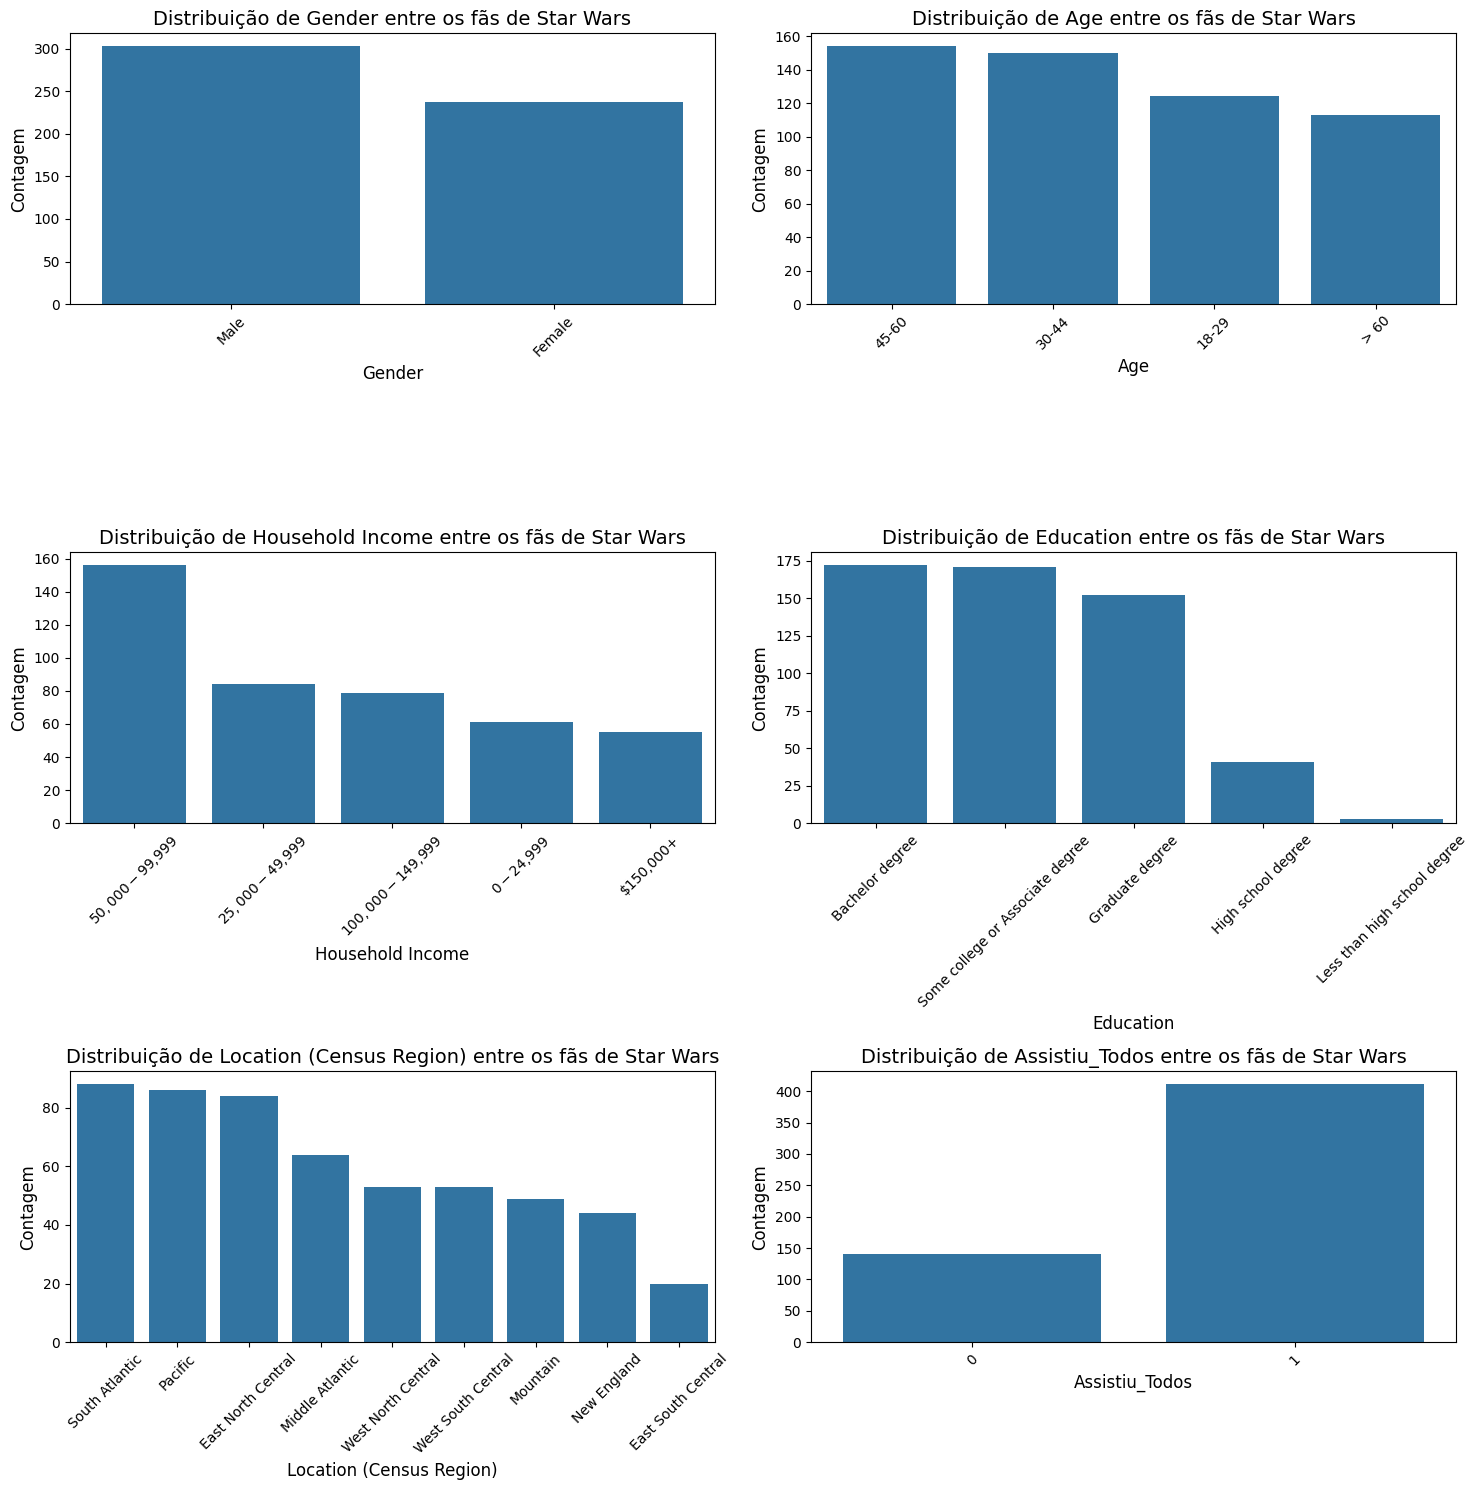

In [112]:
# Número de variáveis demográficas
num_vars = len(demo_infos)

# Determinar o número de linhas e colunas para os subplots
cols = 2  # Número de colunas
rows = (num_vars + cols - 1) // cols  # Calcula o número de linhas necessárias

# Criar a figura e os eixos
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Ajuste o tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar sobre as variáveis demográficas e os eixos
for idx, (i, ax) in enumerate(zip(demo_infos, axes)):
    # Agrupar os dados por categoria e contar as ocorrências
    value_counts = fa_starWars[i].value_counts().reset_index()
    value_counts.columns = [i, 'Contagem']
    
    # Criar o gráfico de barras no eixo correspondente
    sns.barplot(data=value_counts, x=i, y='Contagem', ax=ax)
    
    # Adicionar título e rótulos
    ax.set_title(f'Distribuição de {i} entre os fãs de Star Wars', fontsize=14)
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel('Contagem', fontsize=12)
    # Rotacionar os rótulos do eixo X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Remover subplots vazios (se houver mais subplots do que variáveis)
for ax in axes[len(demo_infos):]:
    fig.delaxes(ax)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\3196642631.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\3196642631.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\3196642631.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gabriel Lopes\AppData\Local\Temp\ipykernel_3696\3196642631.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels

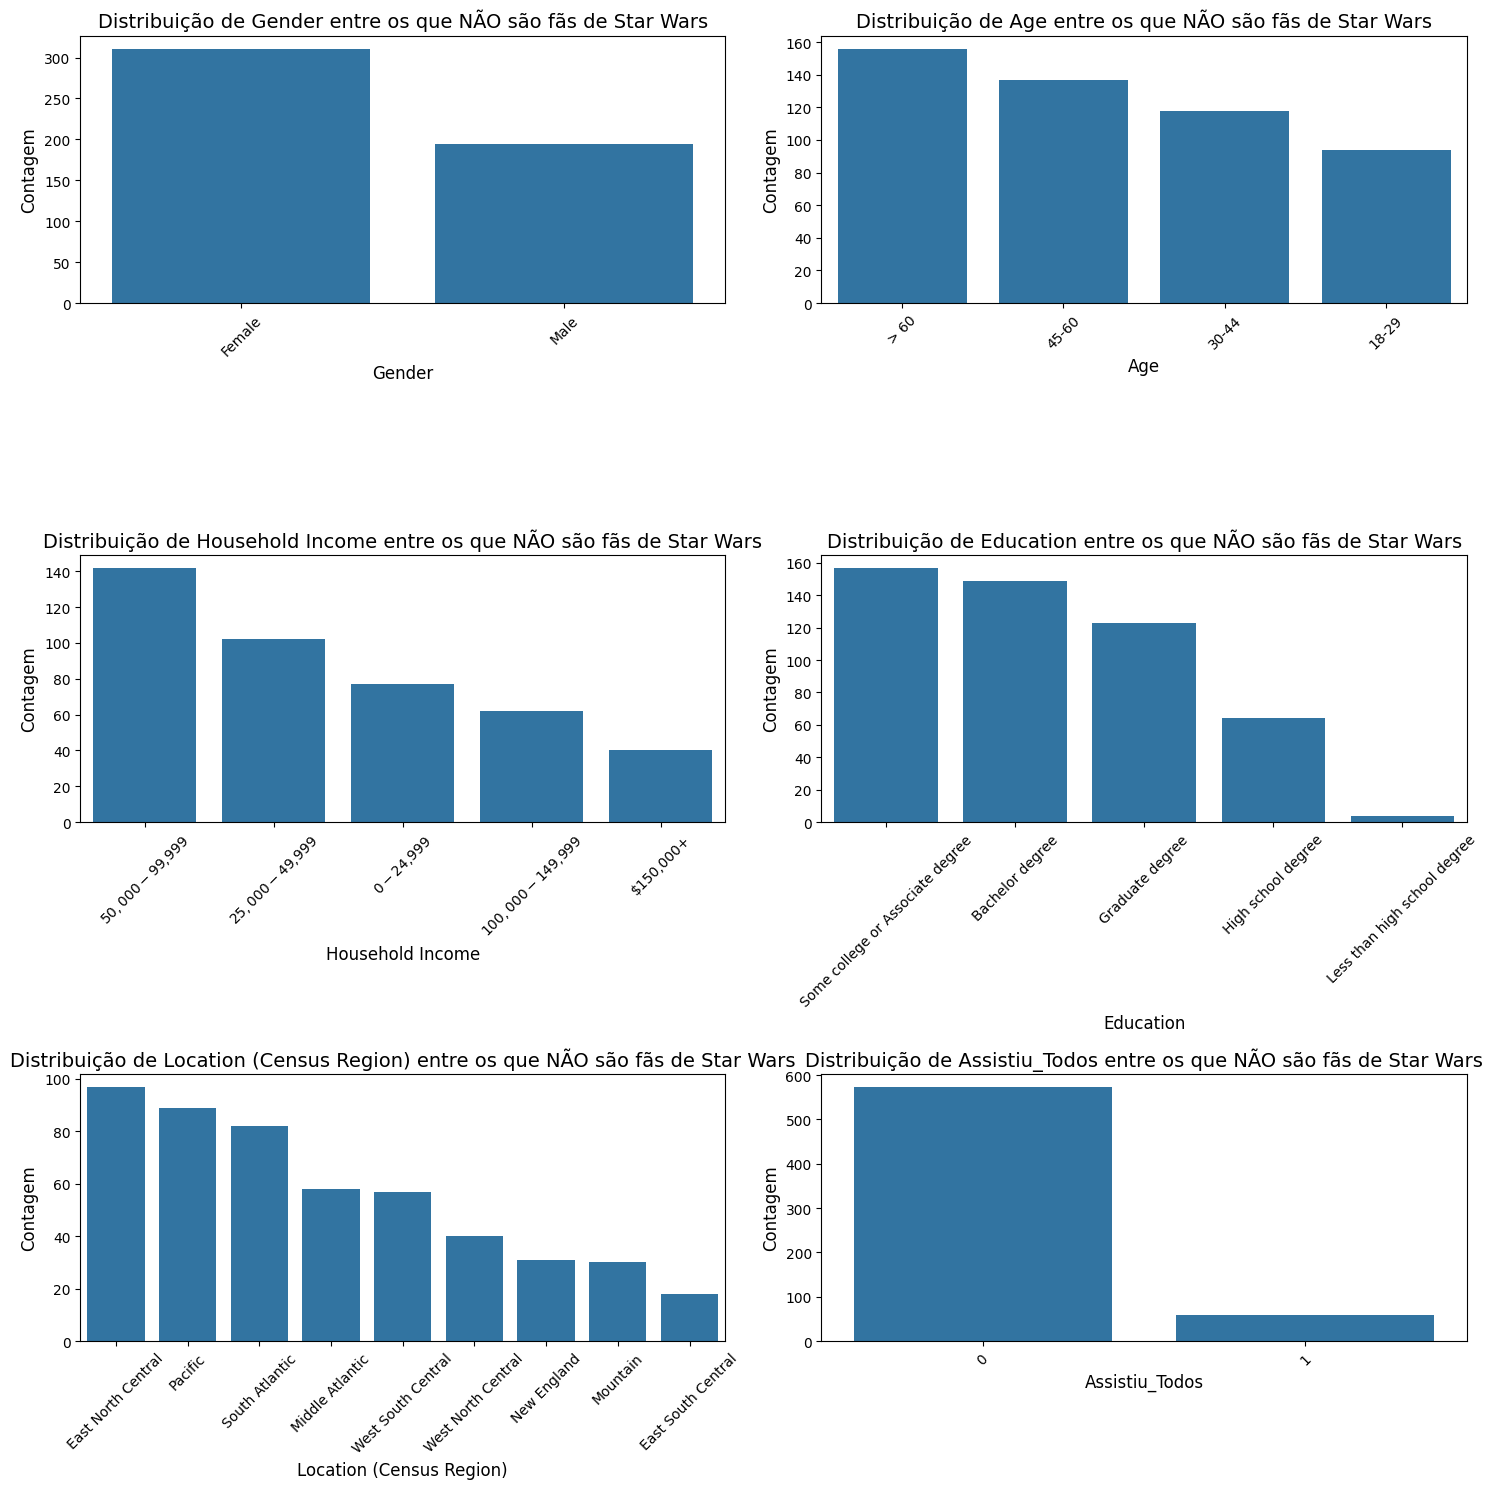

In [113]:
# Número de variáveis demográficas
num_vars = len(demo_infos)

# Determinar o número de linhas e colunas para os subplots
cols = 2  # Número de colunas
rows = (num_vars + cols - 1) // cols  # Calcula o número de linhas necessárias

# Criar a figura e os eixos
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Ajuste o tamanho da figura
axes = axes.flatten()  # Achatar os eixos para facilitar a iteração

# Iterar sobre as variáveis demográficas e os eixos
for idx, (i, ax) in enumerate(zip(demo_infos, axes)):
    # Agrupar os dados por categoria e contar as ocorrências
    value_counts = not_fa_starWars[i].value_counts().reset_index()
    value_counts.columns = [i, 'Contagem']
    
    # Criar o gráfico de barras no eixo correspondente
    sns.barplot(data=value_counts, x=i, y='Contagem', ax=ax)
    
    # Adicionar título e rótulos
    ax.set_title(f'Distribuição de {i} entre os que NÃO são fãs de Star Wars', fontsize=14)
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel('Contagem', fontsize=12)
    # Rotacionar os rótulos do eixo X
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Remover subplots vazios (se houver mais subplots do que variáveis)
for ax in axes[len(demo_infos):]:
    fig.delaxes(ax)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

**Gênero:**

- Entre não-fãs: Há significativamente mais mulheres (aproximadamente 300) do que homens (aproximadamente 200)
- Entre fãs: A tendência é inversa, com mais homens (aproximadamente 300) do que mulheres (aproximadamente 240)

**Idade:**

- A distribuição etária é relativamente similar em ambos os grupos
- Em ambos os casos, há maior concentração nas faixas etárias mais velhas (> 60 e 45-60)
- Entre os fãs, há uma distribuição ligeiramente mais equilibrada entre as faixas etárias

**Renda familiar:**

- Em ambos os grupos, a faixa de renda mais comum é $50,000-$99,999
- A distribuição geral de renda é bastante similar, com uma tendência decrescente à medida que a renda aumenta ou diminui do ponto médio

**Educação:**

- Ambos os grupos apresentam níveis educacionais similares, com maior concentração em "Bachelor degree" e "Some college or Associate degree"
- Há ligeiramente mais pessoas com formação universitária entre os fãs

**Localização (Região do Censo):**

- Para não-fãs: "East North Central" tem a maior contagem, seguida por "Pacific" e "South Atlantic"
- Para fãs: "South Atlantic" tem a maior contagem, seguida por "Pacific" e "East North Central"
- Há algumas diferenças regionais notáveis na distribuição

**Assistiu Todos:**

- Esta categoria parece indicar se a pessoa assistiu todos os filmes
- Entre não-fãs: A grande maioria (aproximadamente 580) não assistiu todos os filmes (valor 0)
- Entre fãs: A maioria (aproximadamente 400) assistiu todos os filmes (valor 1)

Em resumo, as principais diferenças estão na distribuição de gênero (mais homens entre fãs), na distribuição regional, e naturalmente no padrão de consumo dos filmes. As similaridades são mais evidentes nas distribuições de idade, renda e educação.

### Usando probabilidade condicional e assumindo que o gênero influencia na empatia pelo o personagen, qual a probabilidade da pessoa responder 'Very favobly' para a princesa Leia, dada que a pessoa respondente é um homem?

In [114]:
# Garantir que as colunas necessárias existem no DataFrame
if "Gender" in df.columns and "Princess Leia Organa" in df.columns:
    # Garantir que a coluna "Gender" não tenha valores NaN
    df = df[df["Gender"].notna()]
    
    # Filtrar apenas os homens
    homens = df[df["Gender"] == "Male"]
    
    # Garantir que a coluna "Princess Leia Organa" não tenha valores NaN
    homens = homens[homens["Princess Leia Organa"].notna()]
    
    # Total de homens
    total_homens = len(homens)
    
    # Verificar se há homens no DataFrame para evitar divisão por zero
    if total_homens > 0:
        # Homens que responderam "Very favorably" para a Princesa Leia
        homens_favoraveis = homens[homens["Princess Leia Organa"] == "Very favorably"]
        
        # Total de "Very favorably"
        total_very_favorably = len(homens_favoraveis)
        
        # Probabilidade condicional
        prob = total_very_favorably / total_homens
        
        print(f"Probabilidade de um homem responder 'Very favorably' para Leia: {prob:.2%}")
    else:
        print("Não há homens no DataFrame para calcular a probabilidade.")
else:
    print("As colunas necessárias ('Gender' e 'Princess Leia Organa') não estão presentes no DataFrame.")

Probabilidade de um homem responder 'Very favorably' para Leia: 63.18%


Se você escolher **um homem aleatoriamente** entre os que deram uma opinião sobre a Leia, há cerca de **6 em cada 10 chances** de que ele goste **muito** dela.

- A personagem **é bem vista** por grande parte do público masculino da amostra.
    
- Pode indicar que **Leia tem empatia ou impacto positivo** entre os homens que assistiram aos filmes.
    